# Importation

### Questions:

In [1]:
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore")
import sys
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm

import nltk 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
from pdfminer.high_level import extract_text

# pdf into txt 

In [3]:
output_file11 = "E_TEXTPMBOK.txt"
output_file22 = "E_TEXTPMI.txt"
output_file1 = "TEXTPMBOK.txt"
output_file2 = "TEXTPMI.txt"

In [4]:
with open(output_file11, "r", encoding="utf-8") as file:
    E_TEXTPMBOK = file.read()
with open(output_file22, "r", encoding="utf-8") as file:
    E_TEXTPMI = file.read()
    

with open(output_file1, "r", encoding="utf-8") as file:
    TEXTPMBOK = file.read()
with open(output_file2, "r", encoding="utf-8") as file:
    TEXTPMI = file.read()

# Cleaning Data:

In [5]:
def clean_text(text):
    # Remove special characters and symbols (retain letters, numbers, and basic punctuation)
    cleaned_text = re.sub(r'[^a-zA-Z0-9.,!? ]', '', text)
    
    # Remove extra spaces and trim leading/trailing spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

In [6]:
E_TEXTPMBOK=clean_text(E_TEXTPMBOK).lower()
E_TEXTPMI=clean_text(E_TEXTPMI).lower()

In [7]:
E_TEXTPMBOK

'10the project communications management processes arestorage, retrieval, management, monitoring, and the ultimate disposition of project information.pr oje ct communi ca ti ons management10.2 manage communicationsthe process of ensuring timely and appropriate collection, creation, distribution, 10.1 plan communications managementthe process of developing an appropriate approach and plan for project communication activities based on the information needs of each stakeholder or group, available organizational assets, and the needs of the project.project communications management includes the processes necessary to ensure that the information needs of the project and its stakeholders are met through development of artifacts and implementation of activities designed to achieve effective information exchange. project communications management consists of two parts. the rst part is developing a strategy to ensure communication is effective for stakeholders. the second part is carrying out t

#  Tokenization and Normalization:

In [8]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_and_normalize(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Normalize by converting tokens to lowercase
    normalized_tokens = [token.lower() for token in tokens]
    
    return normalized_tokens



In [9]:
words_E_TEXTPMBOK=tokenize_and_normalize(E_TEXTPMBOK)
words_E_TEXTPMI=tokenize_and_normalize(E_TEXTPMI)

#  POS-TAGGING

In [10]:
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
def pos_tagging(words):
    
    # Perform POS tagging
    pos_tags = pos_tag(words)
    
    return pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hamma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
posTEXTPMBOK=pos_tagging(words_E_TEXTPMBOK)
posTEXTPMI=pos_tagging(words_E_TEXTPMI)

In [20]:
posTEXTPMBOK

[('10the', 'CD'),
 ('project', 'NN'),
 ('communications', 'NNS'),
 ('management', 'NN'),
 ('processes', 'VBZ'),
 ('arestorage', 'NN'),
 (',', ','),
 ('retrieval', 'NN'),
 (',', ','),
 ('management', 'NN'),
 (',', ','),
 ('monitoring', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('disposition', 'NN'),
 ('of', 'IN'),
 ('project', 'NN'),
 ('information.pr', 'NN'),
 ('oje', 'IN'),
 ('ct', 'NN'),
 ('communi', 'NN'),
 ('ca', 'MD'),
 ('ti', 'VB'),
 ('ons', 'NNS'),
 ('management10.2', 'JJ'),
 ('manage', 'NN'),
 ('communicationsthe', 'NN'),
 ('process', 'NN'),
 ('of', 'IN'),
 ('ensuring', 'VBG'),
 ('timely', 'JJ'),
 ('and', 'CC'),
 ('appropriate', 'JJ'),
 ('collection', 'NN'),
 (',', ','),
 ('creation', 'NN'),
 (',', ','),
 ('distribution', 'NN'),
 (',', ','),
 ('10.1', 'CD'),
 ('plan', 'NN'),
 ('communications', 'NNS'),
 ('managementthe', 'VBP'),
 ('process', 'NN'),
 ('of', 'IN'),
 ('developing', 'VBG'),
 ('an', 'DT'),
 ('appropriate', 'JJ'),
 ('approach', 'NN'),


#  STOPWORDS

In [12]:
def remove_stopwords_from_list(word_list,pos_tags):
    
    # Define a list of POS tags for words to keep (e.g., nouns and adjectives)
    allowed_pos_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS']  # Nouns and adjectives
    
    # Filter out stopwords based on POS tags
    filtered_words = [word for word, pos_tag in zip(word_list, pos_tags) if pos_tag[1]
                      in allowed_pos_tags]
    
    return filtered_words

In [13]:
posed_TEXTPMBOK=remove_stopwords_from_list(words_E_TEXTPMBOK,posTEXTPMBOK)
posed_TEXTPMI=remove_stopwords_from_list(words_E_TEXTPMI,posTEXTPMI)

In [23]:
posed_TEXTPMBOK

['project',
 'communications',
 'management',
 'arestorage',
 'retrieval',
 'management',
 'monitoring',
 'ultimate',
 'disposition',
 'project',
 'information.pr',
 'ct',
 'communi',
 'ons',
 'management10.2',
 'manage',
 'communicationsthe',
 'process',
 'timely',
 'appropriate',
 'collection',
 'creation',
 'distribution',
 'plan',
 'communications',
 'process',
 'appropriate',
 'approach',
 'plan',
 'project',
 'communication',
 'activities',
 'information',
 'needs',
 'stakeholder',
 'group',
 'available',
 'organizational',
 'assets',
 'needs',
 'project.project',
 'communications',
 'management',
 'processes',
 'necessary',
 'information',
 'needs',
 'project',
 'stakeholders',
 'development',
 'artifacts',
 'implementation',
 'activities',
 'effective',
 'information',
 'exchange',
 'project',
 'communications',
 'management',
 'parts',
 'rst',
 'part',
 'strategy',
 'communication',
 'effective',
 'stakeholders',
 'second',
 'part',
 'activities',
 'necessary',
 'communication

#  Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word_list(word_list):
    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each word in the list
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_list]
    
    return lemmatized_words

In [15]:
lemmatized_TEXTPMBOK=lemmatize_word_list(posed_TEXTPMBOK)
lemmatized_TEXTPMI=lemmatize_word_list(posed_TEXTPMI)

In [26]:
lemmatized_TEXTPMBOK

['project',
 'communication',
 'management',
 'arestorage',
 'retrieval',
 'management',
 'monitoring',
 'ultimate',
 'disposition',
 'project',
 'information.pr',
 'ct',
 'communi',
 'ons',
 'management10.2',
 'manage',
 'communicationsthe',
 'process',
 'timely',
 'appropriate',
 'collection',
 'creation',
 'distribution',
 'plan',
 'communication',
 'process',
 'appropriate',
 'approach',
 'plan',
 'project',
 'communication',
 'activity',
 'information',
 'need',
 'stakeholder',
 'group',
 'available',
 'organizational',
 'asset',
 'need',
 'project.project',
 'communication',
 'management',
 'process',
 'necessary',
 'information',
 'need',
 'project',
 'stakeholder',
 'development',
 'artifact',
 'implementation',
 'activity',
 'effective',
 'information',
 'exchange',
 'project',
 'communication',
 'management',
 'part',
 'rst',
 'part',
 'strategy',
 'communication',
 'effective',
 'stakeholder',
 'second',
 'part',
 'activity',
 'necessary',
 'communication',
 'strategy.n',
 '

#  Chunking

<span style='color: blue;'>While lemmatization and POS tagging involve analyzing individual words and their grammatical properties, chunking involves identifying and grouping words into larger phrases or chunks based on specific linguistic patterns.</span>

The extracted chunks can be used as building blocks for constructing a conceptual ontology that represents the relationships and hierarchy of PRM concepts. Each chunk can correspond to a node in the graph, and the grammar rules can help define the edges and connections between nodes.

In [27]:
from nltk import word_tokenize, pos_tag, RegexpParser
# Define a chunking grammar using regular expressions
grammar = r"""
    NP: {<DT>?<JJ>*<NN>}  # Chunk sequences of determiner, adjective, noun
    VP: {<VB.*><NP|PP|CLAUSE>+$}  # Chunk verbs and their complements
    PP: {<IN><NP>}  # Chunk prepositions and their objects
    CLAUSE: {<NP><VP>}  # Chunk noun phrases and verb phrases
"""
# Create a chunk parser using the defined grammar
chunk_parser = RegexpParser(grammar)
    
# Perform chunking
chunks = chunk_parser.parse(posTEXTPMBOK[1:20])
    
chunks.pretty_print()

                                                                                    S                                                                                                                      
        ____________________________________________________________________________|______________________________________________________________________________________________________________         
       |              |        |   |   |   |    |        |            |             |            |             |             |                   |                            PP                   |       
       |              |        |   |   |   |    |        |            |             |            |             |             |                   |                        ____|______              |        
       |              |        |   |   |   |    |        NP           NP            NP           NP            NP            NP                  NP                      |           N

# Noun Phrase and Verb Phrase Chunking 
# (output: 2 lists; concepts & relationships)

In [21]:
import nltk
from nltk import word_tokenize, pos_tag, RegexpParser

tokens = word_tokenize(E_TEXTPMBOK)
pos_tags = pos_tag(tokens)

# Define a chunking grammar for noun phrases (NP) and verb phrases (VP)
grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
    VP: {<VB.*>+<NP>?}      # Chunk verb phrases with optional NP
"""
chunk_parser = RegexpParser(grammar)

# Perform chunking to identify NP and VP
chunked_text = chunk_parser.parse(pos_tags)

# Extract and print identified concepts and relationships
concepts = []
relationships = []

for subtree in chunked_text.subtrees():
    if subtree.label() == 'NP':
        concepts.append(" ".join(word for word, pos in subtree.leaves()))
    elif subtree.label() == 'VP':
        relationships.append(" ".join(word for word, pos in subtree.leaves()))
        
        
#concept frequencies
concept_freq = Counter(concepts)
frequency_threshold = 10  #el concept elli yet3awed at least 10 times
pertinent_concepts = [concept for concept in concepts if concept_freq[concept] >= frequency_threshold]


print(f"Total Concepts: {len(concepts)}")
print(f"Total Concepts: {len(pertinent_concepts)}")
print(f"Total Relationships: {len(relationships)}")
print("================================================================")
print("Concepts:", concepts)
print("Relationships:", relationships)

with open("Concepts&Relationships.txt", "w") as output_file:
    output_file.write("Concepts:\n")
    for concept in concepts:
        output_file.write(f"{concept}\n")
    
    output_file.write("\nRelationships:\n")
    for relationship in relationships:
        output_file.write(f"{relationship}\n")

Total Concepts: 4217
Total Concepts: 924
Total Relationships: 2030
Concepts: ['project communications management', 'arestorage', 'retrieval', 'management', 'monitoring', 'the ultimate disposition', 'project information.pr', 'ct communi', 'ons', 'management10.2 manage communicationsthe process', 'appropriate collection', 'creation', 'distribution', 'plan communications', 'process', 'an appropriate approach', 'plan', 'project communication activities', 'the information needs', 'each stakeholder', 'group', 'available organizational assets', 'the needs', 'the project.project communications management', 'the processes', 'the information needs', 'the project', 'stakeholders', 'development', 'artifacts', 'implementation', 'activities', 'effective information exchange', 'project communications management', 'parts', 'the rst part', 'a strategy', 'communication', 'stakeholders', 'the second part', 'the activities', 'the communication strategy.n', 'ot f', 'distribution', 's ale', 'r eproduction.f

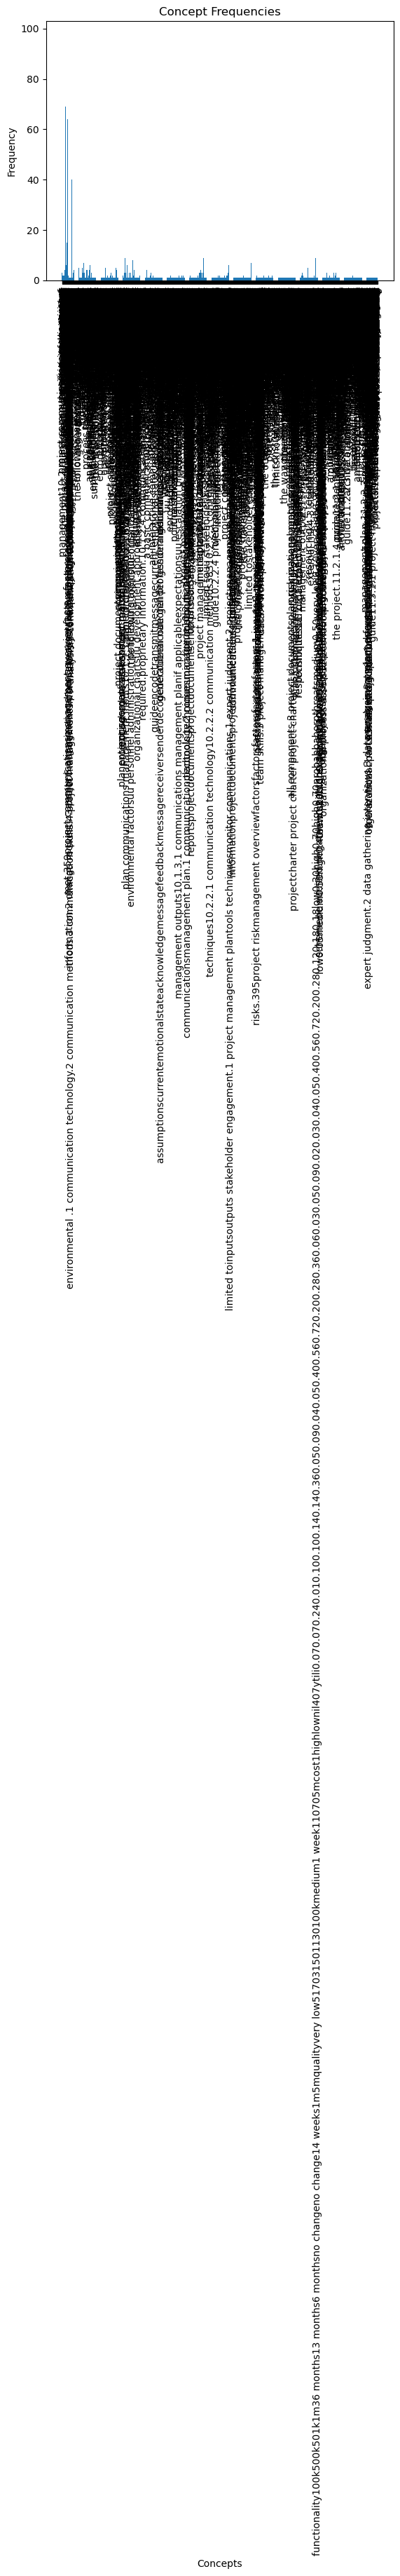

In [22]:
import matplotlib.pyplot as plt
from collections import Counter
# Your code for concept identification or analysis goes here

# Calculate concept frequencies
concept_freq = Counter(concepts)

# Create a bar chart to visualize concept frequencies
plt.bar(concept_freq.keys(), concept_freq.values())
plt.xlabel("Concepts")
plt.ylabel("Frequency")
plt.title("Concept Frequencies")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


# SBERT

In [18]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Define your input text (E_TEXTPMBOK) here
input_text = ("jihen has left the school."," the school has closed."," jihen went home."," jihen slept."," school burn")

# Load a pre-trained SBERT model (e.g., 'paraphrase-MiniLM-L6-v2')
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Tokenize and encode the input text to obtain sentence embeddings
sentences = [input_text]
sentence_embeddings = model.encode(sentences)

# Print the sentence embeddings
print("Sentence Embeddings:")
print(sentence_embeddings)

# Calculate the mean embedding for concept identification
mean_embedding = np.mean(sentence_embeddings, axis=0)
print("\nMean Sentence Embedding:")
print(mean_embedding)


Sentence Embeddings:
[[ 2.56425887e-01  2.68451095e-01  4.16374624e-01 -6.15313470e-01
  -1.55207783e-01 -1.85502693e-01 -6.19513869e-01  3.61535251e-01
   2.35892802e-01  3.85594338e-01  1.73575757e-03  3.26138943e-01
  -1.44725870e-02 -8.52596387e-02 -2.77340144e-01 -2.13590682e-01
  -9.49646711e-01  4.69030976e-01 -3.00379872e-01 -3.35552990e-01
   7.13255852e-02 -9.42092463e-02  3.93935800e-01  7.41757639e-03
   2.36708030e-01  4.45234686e-01  3.56044769e-01 -2.42995486e-01
   1.28004834e-01  3.68245900e-01 -7.62501583e-02 -1.53462559e-01
  -3.39115709e-01  1.13563642e-01  1.63634479e-01  5.70524096e-01
  -9.58528444e-02 -1.47111518e-02  2.72706151e-01  1.04148716e-01
   4.20436949e-01  3.25635791e-01 -1.14223994e-01  3.55052985e-02
   1.12169802e+00  2.92410403e-01 -2.70932078e-01 -8.89141440e-01
   4.59736073e-03 -3.77085686e-01 -3.13165486e-01 -3.88811976e-01
   2.39716455e-01  3.16070110e-01 -3.82023871e-01  1.75284311e-01
   2.07824707e-01 -2.40959689e-01  2.68209308e-01  4.48

In [39]:
import nltk
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Define your chunking grammar (replace with your grammar)
grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
    VP: {<VB.*>+<NP>?}      # Chunk verb phrases with optional NP
"""
chunk_parser = nltk.RegexpParser(grammar)

# Define the number of folds
n_folds = 5  # Adjust as needed

# Initialize cross-validation
kf = KFold(n_splits=n_folds)

precision_scores = []
recall_scores = []
f1_scores = []

# Perform k-fold cross-validation
for train_indices, eval_indices in kf.split(posTEXTPMBOK):
    # Split data into training and evaluation subsets
    train_subset = [posTEXTPMBOK[i] for i in train_indices]
    eval_subset = [posTEXTPMBOK[i] for i in eval_indices]

    # Train the chunking model on training data
    trained_chunker = nltk.RegexpParser(grammar)

    # Evaluate the chunking model on evaluation data
    extracted_chunks = []
    expected_chunks = []

    for sentence in eval_subset:
        # Skip sentences with fewer than two elements
        if len(sentence) < 2:
            continue

        # Extract words and POS tags
        words, pos_tags = zip(*[(word, pos_tag) for word, pos_tag in sentence])

        # Use the extracted information for chunking and evaluation
        extracted_tree = trained_chunker.parse(list(zip(words, pos_tags)))

        # Extract expected chunks (if available) from evaluation data
        if len(sentence) >= 3:
            expected_chunks.extend(sentence[2:])

        extracted_chunks.extend(nltk.chunk.tree2conlltags(extracted_tree))




    # Calculate precision, recall, and F1-score
    y_true = [chunk for _, _, chunk in expected_chunks]
    y_pred = [chunk for _, _, chunk in extracted_chunks]

    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Store evaluation results for this fold
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Aggregate results
mean_precision = sum(precision_scores) / n_folds
mean_recall = sum(recall_scores) / n_folds
mean_f1 = sum(f1_scores) / n_folds

# Print aggregated results
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F1-Score: {mean_f1:.2f}")


ValueError: too many values to unpack (expected 2)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity  # Import cosine_similarity function

# Encode the input text
input_text_embedding = model.encode(["manegemnt"])

# Calculate cosine similarity between the query sentence and the input text
similarities = cosine_similarity(input_text_embedding, sentence_embeddings)[0]

# Find the index of the most similar sentence
most_similar_index = similarities.argmax()

# Get the most similar sentence
most_similar_sentence = cleaned_text.split('.')[most_similar_index]

# Print the most similar sentence
print("Most Similar Sentence:", most_similar_sentence)


NameError: name 'cleaned_text' is not defined

In [64]:
import nltk
from nltk.chunk import ChunkParserI
from nltk.chunk.util import conlltags2tree, tree2conlltags
from nltk import word_tokenize, pos_tag, RegexpParser
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score



grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
    VP: {<VB.*>+<NP>?}      # Chunk verb phrases with optional NP
"""
chunk_parser = RegexpParser(grammar)

n_folds = 5  

# Initialize cross-validation
kf = KFold(n_splits=n_folds)

precision_scores = []
recall_scores = []
f1_scores = []

# Perform k-fold cross-validation
for train_indices, eval_indices in kf.split(E_TEXTPMBOK):
    # Split data into training and evaluation subsets
    train_data = [E_TEXTPMBOK[i] for i in train_indices]
    eval_data = [E_TEXTPMBOK[i] for i in eval_indices]

    # Train the chunking model on training data
    trained_chunker = ChunkParserI.train(train_data, chunk_parser)

    # Evaluate the chunking model on evaluation data
    extracted_chunks = []
    expected_chunks = []

    for sentence in eval_data:
        words, tags, chunks = zip(*[(word, pos, chunk) for word, pos, chunk in sentence])
        tree = conlltags2tree([(word, pos, chunk) for word, pos, chunk in zip(words, tags, chunks)])
        extracted_chunks.extend(tree2conlltags(trained_chunker.parse(words)))

    # Extract expected chunks from evaluation data (if available)
    expected_chunks.extend([(word, pos, chunk) for sentence in eval_data for word, pos, chunk in sentence])

    # Calculate precision, recall, and F1-score
    y_true = [chunk for _, _, chunk in expected_chunks]
    y_pred = [chunk for _, _, chunk in extracted_chunks]

    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Store evaluation results for this fold
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Aggregate results
mean_precision = sum(precision_scores) / n_folds
mean_recall = sum(recall_scores) / n_folds
mean_f1 = sum(f1_scores) / n_folds

# Print aggregated results
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F1-Score: {mean_f1:.2f}")


AttributeError: type object 'ChunkParserI' has no attribute 'train'

In [14]:
from transformers import BertTokenizer, BertModel
import torch

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')




# Tokenize the text
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(E_TEXTPMBOK)))

# Divide the tokens into chunks of 512 tokens each
max_chunk_length = 510
chunks = [tokens[i:i+max_chunk_length] for i in range(0, len(tokens), max_chunk_length)]

# Process each chunk separately
for chunk in chunks:
    input_ids = tokenizer.encode(chunk, add_special_tokens=True)
    with torch.no_grad():
        embeddings = model(torch.tensor(input_ids).unsqueeze(0))[0]
        
    # Detection of breakpoints (cosine similarity)
    threshold = 0.9
    breakpoints = []
    for i in range(1, len(embeddings)):
        similarity = torch.cosine_similarity(embeddings[i - 1], embeddings[i], dim=0)
        if similarity < threshold:
            breakpoints.append(i)

    # Segmentation of the text into sections
    sections = []
    start = 0
    for breakpoint in breakpoints:
        sections.append(tokens[start:breakpoint])
        start = breakpoint

    # Add the last section
    sections.append(tokens[start:])

# Reconstruct the sections into text
for i, section_tokens in enumerate(sections):
    section_text = tokenizer.convert_tokens_to_string(section_tokens)
    print(f"Section {i + 1}:\n{section_text}\n")

Token indices sequence length is longer than the specified maximum sequence length for this model (23162 > 512). Running this sequence through the model will result in indexing errors


Section 1:
[CLS] 10 the project communications management processes are : storage , retrieval , management , monitoring , and the ultimate disposition of project information . pr oje ct communi ca ti ons management 10 . 2 manage communications — the process of ensuring timely and appropriate collection , creation , distribution , 10 . 1 plan communications management — the process of developing an appropriate approach and plan for project communication activities based on the information needs of each stakeholder or group , available organizational assets , and the needs of the project . project communications management includes the processes necessary to ensure that the information needs of the project and its stakeholders are met through development of artifacts and implementation of activities designed to achieve effective information exchange . project communications management consists of two parts . the ﬁrst part is developing a strategy to ensure communication is effective for 